# Pandas Test - Real life Exercise

In [242]:
import pandas as pd

For visualizations:

In [243]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [270]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
234072,2021-week_49,AD087WGP97,iDreamsky Technology,GB,yes,NaN,Yield,ManualQ
49990,2021-week_36,AD088889YS,Search Million Culture,IN,yes,NaN,Qality,UserPopQ
81090,2021-week_38,AD078KGW9H,RelayFoods,JP,no,False,Qality,UserPopQ
344441,2022-week_06,AD86880988,Search Million Culture,DE,yes,NaN,Qality,BooksQ
192408,2021-week_46,AD00KXPQF7,RelayFoods,GB,yes,NaN,Qality,DNNQ


In [271]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()

In [272]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [273]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [274]:
ad_recs_annotated['sample_year'] = ad_recs_annotated.week_id.apply(lambda text: text[:4])

In [275]:
weeks = ad_recs_annotated.week_id.apply(lambda text: int(text.split('_')[1]))
ad_recs_annotated['sample_quarter'] = (weeks // 13) + 1
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3


In [276]:
ad_recs_annotated['success'] = ad_recs_annotated.is_success.apply(lambda text: 1 if text == 'yes' else 0)
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,3,1


In [277]:
ad_recs_annotated2 = ad_recs_annotated.copy()
print (f'Number of NaNs = {ad_recs_annotated2.is_sever.isna().sum()}')
ad_recs_annotated2.is_sever.fillna(False, inplace = True)
print (f'Number of NaNs after transfromation = {ad_recs_annotated2.is_sever.isna().sum()}')

Number of NaNs = 304195
Number of NaNs after transfromation = 0


In [278]:
ad_recs_annotated.is_success = ad_recs_annotated.is_success.apply(lambda x: x.capitalize())
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1
...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,5,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,5,1


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [279]:
ad_recs_annotated.query('region == "US"').shape

(103846, 11)

In [280]:
ad_recs_annotated.query('region == "US" & success == 1').shape

(88918, 11)

In [281]:
ad_recs_annotated['week_number'] = weeks
ad_recs_annotated.query('region == "US" & success == 1 & week_number == 52').shape

(3342, 12)

In [282]:
ad_recs_annotated.loc[ad_recs_annotated.rec_provider.isin(["DNNQ", "RNNY", "UserPopQ"]), "rec_provider"].value_counts().sum()

200093

In [283]:
ad_recs_annotated.query('rec_provider == "RuleBasedY" | rec_provider == "RuleBased"').shape

(28336, 12)

In [284]:
ad_recs_annotated.query('sample_year == "2021"').shape

(271615, 12)

In [285]:
ad_recs_annotated.query('30 <= week_number <= 40').shape

(115051, 12)

In [286]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,52
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,52
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,5,1,52
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,52


In [287]:
least_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmin()
ad_recs_annotated.query('ad_id == @least_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
251351,2021-week_50,AD08ZLWHHR,RelayFoods,IN,Yes,NaN,Qality,UserPopQ,2021,4,1,50


In [288]:
ad_recs_annotated.query('is_sever == False')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
44,2021-week_33,AD07FK8888,Search Million Culture,DE,No,False,Qality,BooksQ,2021,3,0,33
46,2021-week_33,AD00JG8D7U,SOLOMO365,DE,No,False,Qality,UserPopQ,2021,3,0,33
51,2021-week_33,AD80688889,Search Million Culture,DE,No,False,Qality,BooksQ,2021,3,0,33
66,2021-week_33,AD0988K8R9,Search Million Culture,DE,No,False,Qality,DNNQ,2021,3,0,33
68,2021-week_33,AD088P6887,Search Million Culture,DE,No,False,Qality,UserPopQ,2021,3,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...
373704,2022-week_52,AD08L788VC,Extreme DA,US,No,False,Yield,RuleBasedY,2022,5,0,52
373729,2022-week_52,AD09MCYZCG,Extreme DA,US,No,False,Yield,RuleBasedY,2022,5,0,52
373730,2022-week_52,AD07JGDT8K,Extreme DA,US,No,False,Yield,RuleBasedY,2022,5,0,52
373738,2022-week_52,AD008N8MW8,Fancy,US,No,False,Qality,DNNQ,2022,5,0,52


In [289]:
mask1 = ad_recs_annotated.requester.apply(lambda x: True if len(x.split()) == 3 else False)
ad_recs_annotated[mask1]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,5,1,52
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,5,1,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,5,1,52


In [290]:
mask2 = ad_recs_annotated.ad_id.apply(lambda x: '6' in x)
ad_recs_annotated[mask1 & mask2]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,5,1,52
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,52


In [291]:
def multiply_digits_in_string(my_string):
    product = 1
    for char in my_string:
        if char.isdigit():
            product *= int(char)
    return product

mask3 = ad_recs_annotated.ad_id.apply(lambda x: True if multiply_digits_in_string(x) > 30 else False)
ad_recs_annotated[mask1 & mask3]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
37,2021-week_33,AD88898888,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
76,2021-week_33,AD88898786,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2021,3,1,33
112,2021-week_33,AD88788887,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
162,2021-week_33,AD88887688,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
174,2021-week_33,AD88888876,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
360315,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,5,1,52
362075,2022-week_52,AD88888997,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2022,5,1,52
362199,2022-week_52,AD88688888,Mission Street Manufacturing,GB,No,False,Qality,UserPopQ,2022,5,0,52
363286,2022-week_52,AD88887888,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2022,5,1,52


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [292]:
# How many weeks available in the data? Are there any missing weeks? 
print(f'Weeks available in the data = {ad_recs_annotated.week_id.nunique()}')
print(f'For two years there supposed to be 104 weeks so we are missing {104 - 26} weeks')

Weeks available in the data = 26
For two years there supposed to be 104 weeks so we are missing 78 weeks


In [293]:
# How many regions available in the data? Are there any missing weeks per region?
print(f'Regions available in the data = {ad_recs_annotated.region.nunique()}')
ad_recs_annotated.groupby('region').week_id.nunique()

Regions available in the data = 5


region
DE    26
GB    26
IN    26
JP    25
US    26
Name: week_id, dtype: int64

In [294]:
# How many ads are being sent to annotation in each region per week?
ad_recs_annotated.groupby(['region', 'week_id']).week_id.count()

region  week_id     
DE      2021-week_33    2395
        2021-week_34    2360
        2021-week_35    2393
        2021-week_36    2401
        2021-week_37    2404
                        ... 
US      2022-week_03    3979
        2022-week_04    3999
        2022-week_05    3998
        2022-week_06    3992
        2022-week_52    3998
Name: week_id, Length: 129, dtype: int64

In [298]:
# How many None values are there in is_sever column?
ad_recs_annotated[pd.isna(ad_recs_annotated.is_sever)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,5,1,52
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,5,1,52


In [299]:
# Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_recs_annotated.groupby(['week_id', 'ad_id']).size().idxmax()

('2021-week_40', 'AD098SWYF6')

In [300]:
# 6. Are there ads that are being sent in more than one week?
# A. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
index_of_most_pop_ad_per_week = ad_recs_annotated.groupby('ad_id').week_id.nunique().idxmax()
print(index_of_most_pop_ad_per_week)

AD079VP6DH


In [301]:
# B. What are the weeks that the ad from above was sent in?
ad_recs_annotated[ad_recs_annotated.ad_id == index_of_most_pop_ad_per_week]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
11605,2021-week_33,AD079VP6DH,VarVee,US,Yes,NaN,Yield,RNNY,2021,3,1,33
12277,2021-week_33,AD079VP6DH,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,3,1,33
12278,2021-week_33,AD079VP6DH,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,3,1,33
12279,2021-week_33,AD079VP6DH,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,3,1,33
12280,2021-week_33,AD079VP6DH,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,3,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
353947,2022-week_06,AD079VP6DH,iDreamsky Technology,US,Yes,NaN,Qality,ManualQ,2022,1,1,6
353948,2022-week_06,AD079VP6DH,Fancy,US,Yes,NaN,Qality,ManualQ,2022,1,1,6
355155,2022-week_06,AD079VP6DH,Extreme DA,US,Yes,NaN,Yield,RNNY,2022,1,1,6
370254,2022-week_52,AD079VP6DH,Fancy,US,Yes,NaN,Qality,ManualQ,2022,5,1,52


In [302]:
# C. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
#ad_recs_annotated.groupby('ad_id').is_success.value_counts().loc['ad_id',:]
grouped = ad_recs_annotated.groupby('ad_id').filter(lambda x: x['is_success'].nunique() > 1)
grouped['ad_id'].unique()

array(['AD07H9DVL', 'AD08DK8CNF', 'AD80688889', ..., 'AD07K6JSR',
       'AD08WH888F', 'AD089DNM8L'], dtype=object)

In [310]:
# When is_sever is None, what is the number of successful requests? What is the number of non-successful requests?
# What do you learn from it about the reason for Nones in the first place?
ad_recs_annotated.groupby('is_sever', dropna = False).is_success.value_counts()

# we learn that the reason for None, is mostly because the ad was successful

is_sever  is_success
False     No             24899
          Yes                5
True      No             44677
          Yes               12
NaN       Yes           304189
          No                 6
Name: is_success, dtype: int64

In [325]:
# Per each region, What is the Quality/Yield traffic proportion WoW?
value_counts_recommend = ad_recs_annotated.groupby(['region', 'week_id']).recommendation_type.value_counts()
size_of_each_week = ad_recs_annotated.groupby(['region', 'week_id']).recommendation_type.size()
round((value_counts_recommend / size_of_each_week) * 100, 2)

region  week_id       recommendation_type
DE      2021-week_33  Qality                 79.67
                      Yield                  20.33
        2021-week_34  Qality                 83.69
                      Yield                  16.31
        2021-week_35  Qality                 77.31
                                             ...  
US      2022-week_05  Qality                 34.89
        2022-week_06  Yield                  63.20
                      Qality                 36.80
        2022-week_52  Yield                  67.51
                      Qality                 32.49
Name: recommendation_type, Length: 258, dtype: float64

In [329]:
# How many different reqeusters are there?
len(ad_recs_annotated.requester.unique())

36

In [332]:
# Which are the top 5 requesters per region?
ad_recs_annotated.groupby('region').requester.apply(lambda grp: grp.value_counts().nlargest(5))

region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

In [333]:
# Which are the different rec_proivders?
ad_recs_annotated.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [341]:
# Are there different rec providers per region?
ad_recs_annotated.groupby('region').rec_provider.unique()

region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
Name: rec_provider, dtype: object

In [342]:
ad_recs_annotated.groupby('region').rec_provider.nunique()

region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

In [359]:
# Are there different rec providers per rec type?
ad_recs_annotated.groupby('recommendation_type').rec_provider.unique()['Qality']

array(['DNNQ', 'BooksQ', 'UserPopQ', 'ManualY', 'ManualQ', 'XGBQ', 'RNNQ',
       'RuleBased', 'UserPopSelectionQ'], dtype=object)

In [360]:
ad_recs_annotated.groupby('recommendation_type').rec_provider.unique()['Yield']

array(['DNNY', 'UserPopY', 'RuleBasedY', 'BooksY', 'ManualY', 'ManualQ',
       'XGBY', 'RNNY', 'UserPopSelectionY'], dtype=object)

In [361]:
# What are the notation rules distinguishing between quality vs yielding providers?
# Quality - ends with Q, except for ManualY and RuleBased
# Yield - ends with Y, except for ManualQ

In [371]:
# Which is the most successful region of operation?
def success_rate (success_vector):
    return round((success_vector == 'Yes').mean() * 100, 2)
ad_recs_annotated.groupby('region').is_success.apply(success_rate).sort_values(ascending = False)

region
US    85.62
GB    83.76
DE    81.42
JP    76.39
IN    76.19
Name: is_success, dtype: float64

In [378]:
# Which is the most successful rec provider per each region?
success_rates = ad_recs_annotated.groupby(['region', 'rec_provider']).is_success.apply(success_rate)
success_rates.loc[success_rates.groupby('region').idxmax()]

region  rec_provider
DE      BooksY          96.66
GB      RuleBased       97.50
IN      ManualQ         95.24
JP      ManualQ         93.40
US      BooksY          98.55
Name: is_success, dtype: float64

In [395]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per region
def sever_rate (sever_vector):
    return round((sever_vector == True).mean() * 100, 2)

import math

def bool_CI(vector, positive):
    mean_v = (vector == positive).mean()
    std_v = (vector == positive).std()
    count_v = vector.count()
    CI_low = round((mean_v - 1.96*std_v/math.sqrt(count_v)) * 100, 4)
    CI_high = round((mean_v + 1.96*std_v/math.sqrt(count_v)) * 100, 4)
    return (CI_low, CI_high)

In [397]:
def success_sever_df(grpby):
    a = grpby.is_success.apply(success_rate).rename('success_rate')
    b = grpby.is_success.apply(lambda x: bool_CI(x, 'Yes')).rename('success_CI')
    c = grpby.is_sever.apply(sever_rate).rename('sever_rate')
    d = grpby.is_sever.apply(lambda x: bool_CI(x, True)).rename('sever_CI')
    return pd.concat([a,b,c,d], axis=1)

success_sever_df(ad_recs_annotated.groupby('region'))

,success_rate,success_CI,sever_rate,sever_CI
region,,,,
DE,81.42,"(81.1134, 81.7249)",11.36,"(10.7809, 11.9381)"
GB,83.76,"(83.511, 84.0129)",11.96,"(11.417, 12.5129)"
IN,76.19,"(75.9005, 76.4795)",14.11,"(13.6287, 14.5985)"
JP,76.39,"(75.9848, 76.8007)",15.51,"(14.7958, 16.2273)"
US,85.62,"(85.4115, 85.8383)",9.15,"(8.6895, 9.6146)"


In [398]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
success_sever_df(ad_recs_annotated.groupby('rec_provider'))

,success_rate,success_CI,sever_rate,sever_CI
rec_provider,,,,
BooksQ,83.66,"(81.9151, 85.4105)",1.63,"(0.1478, 3.108)"
BooksY,97.98,"(97.5474, 98.4044)",0.53,"(-1.023, 2.0832)"
DNNQ,85.84,"(85.6382, 86.0371)",11.91,"(11.4134, 12.3978)"
DNNY,88.67,"(88.379, 88.9639)",8.57,"(7.8015, 9.3365)"
ManualQ,95.32,"(94.9674, 95.6711)",2.47,"(1.277, 3.6637)"
ManualY,90.57,"(89.2778, 91.8523)",4.99,"(1.8719, 8.118)"
RNNQ,90.25,"(89.8527, 90.6553)",7.36,"(6.2311, 8.4951)"
RNNY,91.97,"(91.4929, 92.4373)",5.00,"(3.6609, 6.3297)"
RuleBased,96.70,"(94.1021, 99.3045)",3.30,"(-11.0297, 17.6231)"


In [399]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
success_sever_df(ad_recs_annotated.groupby(['region', 'rec_provider']))

success_rate           success_CI  sever_rate  \
region rec_provider                                                       
DE     BooksQ                    79.97   (77.8371, 82.1038)        1.92   
       BooksY                    96.66   (95.6648, 97.6526)        0.80   
       DNNQ                      83.91   (83.5116, 84.3113)       12.29   
       DNNY                      91.73   (90.9962, 92.4633)        4.98   
       ManualQ                   85.74   (83.5401, 87.9475)        4.86   
       ManualY                   96.03   (94.4765, 97.5897)        3.97   
       RuleBasedY                63.32    (60.969, 65.6729)       10.72   
       UserPopQ                  73.11   (72.4088, 73.8195)       13.40   
       UserPopY                  77.95   (76.5429, 79.3509)       14.74   
GB     DNNQ                      87.41   (87.0863, 87.7391)       10.94   
       DNNY                      85.80   (84.9944, 86.5991)       11.14   
       ManualQ                   96.66   (95.8981, 97.4166)        2.18   
       ManualY                   87.34   (84.5679, 90.1156)        8.32   
       RNNQ                      89.25   (88.6821, 89.8208)        8.14   
       RNNY                      87.21    (85.545, 88.8736)        8.59   
       RuleBased                 97.50        (92.6, 102.4)        2.50   
       RuleBasedY                37.70   (35.4865, 39.9056)       50.95   
       UserPopQ                  67.26   (66.1445, 68.3785)       17.37   
       UserPopY                  65.90   (63.6016, 68.1889)       25.94   
       XGBQ                      80.08   (79.2597, 80.8979)       10.78   
       XGBY                      86.20   (84.0251, 88.3815)        9.96   
IN     ManualQ                   95.24   (94.6653, 95.8127)        2.34   
       ManualY                   94.22   (91.1667, 97.2778)        0.00   
       RuleBased                 85.71  (57.7143, 113.7143)       14.29   
       RuleBasedY                62.80    (62.001, 63.5963)       22.66   
       UserPopQ                  79.55   (79.1431, 79.9518)        9.39   
       UserPopY                  74.44   (73.8981, 74.9733)       19.07   
JP     DNNQ                      81.85   (81.3647, 82.3286)       16.35   
       DNNY                      80.10   (78.8386, 81.3584)       13.92   
       ManualQ                   93.40   (91.5557, 95.2448)        3.59   
       ManualY                   54.40   (45.6335, 63.1665)       10.40   
       RuleBasedY                32.38   (28.7109, 36.0419)       22.01   
       UserPopQ                  62.93   (61.8624, 63.9888)       15.69   
       UserPopSelectionQ         81.51   (79.9578, 83.0542)       11.13   
       UserPopSelectionY         85.71  (70.3781, 101.0505)        4.76   
       UserPopY                  50.54   (47.9029, 53.1864)       15.47   
US     BooksQ                    97.28   (95.6073, 98.9432)        0.54   
       BooksY                    98.55   (98.1123, 98.9842)        0.41   
       DNNQ                      90.57   (90.1672, 90.9629)        7.90   
       DNNY                      89.98   (89.6333, 90.3296)        7.87   
       ManualQ                   97.04   (96.5586, 97.5243)        2.09   
       ManualY                   95.15   (93.2113, 97.0841)        3.38   
       RNNQ                      91.44   (90.8803, 91.9989)        6.44   
       RNNY                      92.62   (92.1389, 93.1079)        4.50   
       RuleBased                 97.04    (94.166, 99.9081)        2.96   
       RuleBasedY                54.18   (53.2043, 55.1617)       18.62   
       UserPopQ                  67.34   (65.1896, 69.4975)       18.77   
       UserPopY                  69.75    (68.672, 70.8347)       22.41   
       XGBQ                      81.79   (80.4362, 83.1476)       10.02   
       XGBY                      87.29    (86.154, 88.4233)        9.03   

                                     sever_CI  
region rec_provider                            
DE     BooksQ                

In [401]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
success_sever_df(ad_recs_annotated.groupby(['recommendation_type']))

,success_rate,success_CI,sever_rate,sever_CI
recommendation_type,,,,
Qality,83.09,"(82.9399, 83.242)",10.92,"(10.6154, 11.2266)"
Yield,78.44,"(78.2252, 78.6603)",13.74,"(13.3473, 14.132)"


In [402]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
success_sever_df(ad_recs_annotated.groupby(['recommendation_type', 'region']))

success_rate          success_CI  sever_rate  \
recommendation_type region                                                 
Qality              DE             80.67  (80.3229, 81.0132)       12.15   
                    GB             85.04  (84.7713, 85.3021)       10.83   
                    IN             80.61  (80.2296, 80.9963)        8.90   
                    JP             77.78  (77.3479, 78.2132)       15.66   
                    US             89.91  (89.6138, 90.2002)        7.45   
Yield               DE             84.60  (83.9495, 85.2476)        8.01   
                    GB             77.25  (76.5425, 77.9527)       17.77   
                    IN             71.92  (71.4903, 72.3468)       19.15   
                    JP             68.40  (67.2375, 69.5601)       14.66   
                    US             82.88  (82.5877, 83.1747)       10.24   

                                      sever_CI  
recommendation_type region                      
Qality              DE      (11.5011, 12.7996)  
                    GB      (10.2318, 11.4272)  
                    IN         (8.2709, 9.525)  
                    JP      (14.8564, 16.4611)  
                    US        (6.6427, 8.2514)  
Yield               DE        (6.7675, 9.2567)  
                    GB      (16.4197, 19.1153)  
                    IN       (18.443, 19.8578)  
                    JP      (13.0916, 16.2361)  
                    US       (9.6735, 10.8154)

In [417]:
# Present WoW table/graph with success rate and CI (see image below) per region
success_df1 = success_sever_df(ad_recs_annotated.groupby(['region', 'sample_year', 'week_number'])).sort_values(by = ['region', 'sample_year', 'week_number'])
success_df1['success_wow_change'] = success_df1['success_rate'].pct_change() * 100

In [418]:
success_df1.head(50)


success_rate          success_CI  sever_rate  \
region sample_year week_number                                                 
DE     2021        33                  80.58     (79.0, 82.1691)       11.57   
                   34                  79.79  (78.1676, 81.4087)       13.14   
                   35                  80.69  (79.1119, 82.2755)       11.62   
                   36                  79.51  (77.8936, 81.1234)       11.66   
                   37                  80.62  (79.0351, 82.1962)       11.23   
                   38                  80.58  (79.0004, 82.1662)       11.71   
                   39                  82.84  (81.3352, 84.3482)       10.18   
                   40                  79.91   (78.3045, 81.512)       12.80   
                   41                  81.45  (79.8948, 83.0064)       11.75   
                   42                  80.22  (78.6216, 81.8125)       12.65   
                   43                  77.15  (75.4667, 78.8286)       14.89   
                   44                  76.47  (74.7475, 78.1937)       14.21   
                   45                  80.85  (79.2753, 82.4232)       11.16   
                   46                  81.52  (79.9525, 83.0891)       11.38   
                   47                  82.20  (80.6748, 83.7327)       10.15   
                   48                  82.22  (80.6923, 83.7411)       10.26   
                   49                  82.64  (81.1174, 84.1621)       10.26   
                   50                  82.88  (81.3705, 84.3818)       10.35   
                   51                  80.51  (78.9244, 82.0877)       12.19   
       2022        1                   82.10  (80.5648, 83.6317)       11.37   
                   2                   84.13  (82.6628, 85.5911)        9.27   
                   3                   83.22   (81.719, 84.7234)       10.26   
                   4                   85.29  (83.8574, 86.7135)       10.02   
                   5                   84.59  (83.1427, 86.0429)        9.57   
                   6                   83.54  (82.0618, 85.0185)       10.59   
                   52                  81.32  (79.7526, 82.8838)       11.21   
GB     2021        33                  84.97  (83.7262, 86.2109)       11.04   
                   34                  84.12    (82.854, 85.392)       11.64   
                   35                  85.51  (84.2914, 86.7276)       10.53   
                   36                  83.80  (82.5204, 85.0707)       12.22   
                   37                  85.22  (83.9914, 86.4581)       11.63   
                   38                  83.78  (82.5032, 85.0627)       12.26   
                   39                  80.19  (78.8136, 81.5732)       15.69   
                   40                  81.03  (79.6777, 82.3902)       15.29   
                   41                  83.10  (81.8062, 84.4024)       12.87   
                   42                  82.98  (81.6659, 84.2848)       13.04   
                   43                  82.22  (80.8938, 83.5437)       13.88   
                   44                  83.27  (81.9757, 84.5657)       12.47   
                   45                  85.35  (84.1274, 86.5724)       11.04   
                   46                  86.90  (85.7223, 88.0677)        9.96   
                   47                  88.10  (86.9797, 89.2257)        8.08   
                   48                  84.49  (83.2426, 85.7443)       10.88   
                   49                  83.97  (82.6974, 85.2425)       10.71   
                   50                  83.94  (82.6651, 85.2099)       12.47   
                   51                  83.02  (81.7137, 84.3241)       11.26   
       2022        1                   83.61  (82.3255, 84.8948)       11.22   
                   2                   82.99  (81.6907, 84.2974)       11.84   
                   3                   82.14  (80.8093, 83.4742)       12.72   
                   4            

In [ ]:
# Present WoW table/graph with success rate and CI (see image below) per region and rec type


In [406]:
# Present WoW table/graph with success rate and CI (see image below) per region and rec provider
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarter,success,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,5,1,52
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1,52
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,5,1,52


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

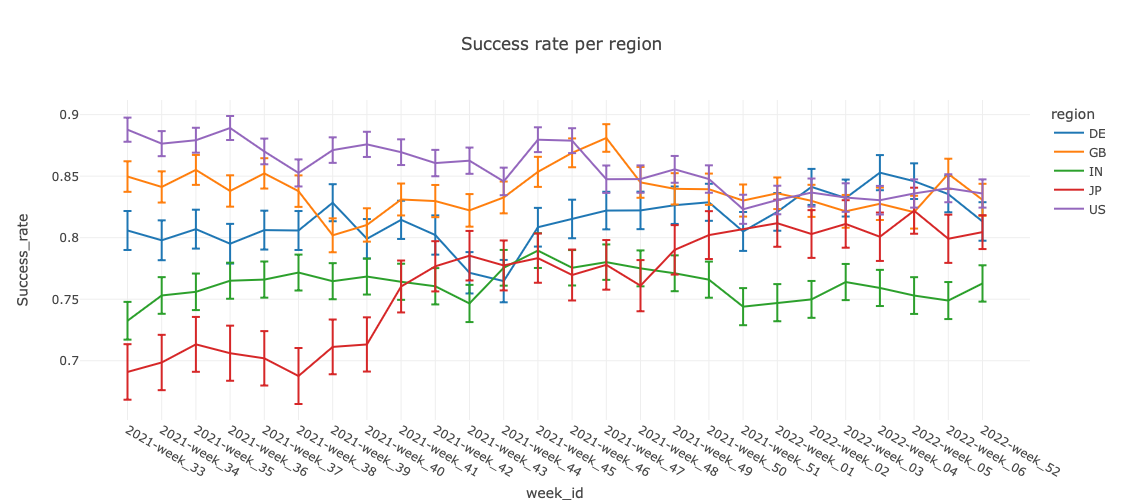

Produce the following requestser proportion graph:

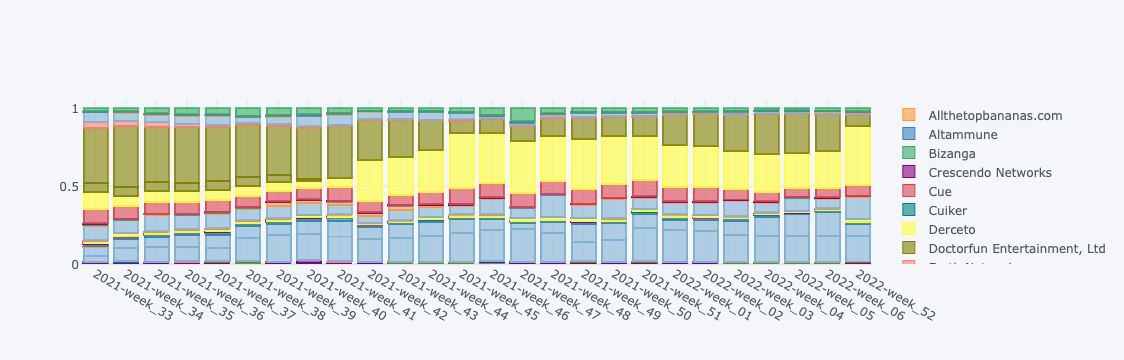

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)